# Machine Learning 1 Lab 1

### Loading In Data and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set Figure Size
plt.rcParams["figure.figsize"] = (20,10)

#Import Dataset from github repo
bankData = pd.read_csv('bank-additional-full.csv', sep=';', na_values="unknown")
#Optional: Add in index column
#bankData.insert(0, 'Sample_ID', range(1,len(bankData)+1))

## Business Understanding

#### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

For this project, we chose to use the "Bank Marketing Data Set" that is stored in the Machine Learning Repository by the University of California, Irvine. The purpose of the data was to predict whether a customer would subscribe to a long-term deposit, which would allow the institution to better pursue those customers specifically. The second prediction we decided to create was what level of education (i.e., high school, years of college, illiteracy, etc.) is associated with increased potential of taking a long-term deposit. Success from using this dataset would be measured in better understanding which attributes affect a customer’s likelihood of taking out a long-term deposit, thereby decreasing the time spent by employees calling those customers who are unlikely to obtain a long-term deposit. In addition, the type of customer who is likely to take a long-term deposit can be readily distinguished and targeted, thereby increasing the number of long-term deposits held by the institution. Predicting whether a customer would take a long-term deposit is either ‘yes’ or ‘no’, making it a classification problem, while which education levels are associated with increased long-term deposits are categorical and will be solved through regression analysis. The effectiveness of the classification model will be measured through accuracy and 10-fold cross validation, while the effectiveness of the regression model will be measured through mean absolute error.

## Data Meaning Type

#### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

The “Bank Marketing Data Set” is stored in the Machine Learning Repository of the University of California, Irvine (UCI). The dataset contains 17 attributes and 45,211 instances collected via a telephone marketing campaign led by a “Portuguese banking institution” (“Bank Marketing Data Set”, June 2014).

Data Meaning Type
As described by the Machine Learning Repository of UCI
* Age – numeric, continuous
* Job – categorical, type of job held, i.e., administrative, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown
* Marital – Categorical; divorced, married, single, unknown
    * Divorced means either divorced or widowed
* Education – categorical; basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown
* Default – Credit in default? Categorical: 'no', 'yes', or 'unknown'
* Housing – Housing loan? Categorical: 'no', 'yes', or 'unknown'
* Loan – Personal loan? Categorical: 'no', 'yes', or 'unknown'
Attributes related with the last contact of the current campaign:
* Contact – Contact communication type. Categorical: 'cellular' or 'telephone'
* Month – Last contact month of year. Categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'
* Day_of_week – last contact day of the week. Categorical: 'mon', 'tue', 'wed', 'thu', 'fri'
* Duration –  numeric, continuous: last contact duration, in seconds.
    * Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* Campaign – numeric, continuous: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* Pdays – numeric, continuous: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
* Previous – numeric, continuous: number of contacts performed before this campaign and for this client.
* Poutcome – outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Social and economic context attributes
* Emp.var.rate – employment variation rate - quarterly indicator (numeric)
* Cons.price.idx – consumer price index - monthly indicator (numeric)
* Cons.conf.idx – consumer confidence index - monthly indicator (numeric)
* Euribor3m – Euribor 3 month rate - daily indicator (numeric)
* Nr.employed – number of employees - quarterly indicator (numeric)
Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: 'yes' or 'no');

## Data Quality

#### 	Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

The full data set contained 41188 rows. Of these, 10700 contain NAN values. Due to the size of the dataset, we decided to omit these missing values. We acknowledge that the omitted data may be representative of a separate population, but given that we still have greater than 30 thousand instances without them, we decided to remove the data for now with the option of using them for additional investigation at a later date.


In [2]:
bankData = bankData.dropna()
bankData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Simple Statistics

#### Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

The following code returns basic statistics for the continous variables. We see that for most of the variables, the mean value is relatively close to the median, meaning that their distributions are close to normal. The Duration attribute, which lists the amount of time the customer spent on the call, the distribution was highly skewed. However, as noted in the "Data Meaning Type" section above, this variable should be removed because the time spent on the call cannot be known until after the call is ended, and obviously those callers who take out a long-term deposit will naturally spend more time on the call which indicates that this variable is likely to skew results in a model.



In [3]:
#Getting basic statistical overview of continuous variables using the describe function
bankData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Visualize Attributes

#### Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

The following code defines a function to produce histograms and boxplots for continuous variables. This code was obtained from a UT Data Science Bootcamp.

In [4]:
def histobox(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

From the two plots below, we can see a somewhat normal distribution of age with a mean of 39. From the boxplot, we can see that outliers occur around the age of 66 to 67. This makes sense practically speaking considering that this dataset is used to predict whether a customer will subscribe to a term deposit which can be considered a financial investment and it would be less likely that customers above the average retirement age would make an investment.

/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


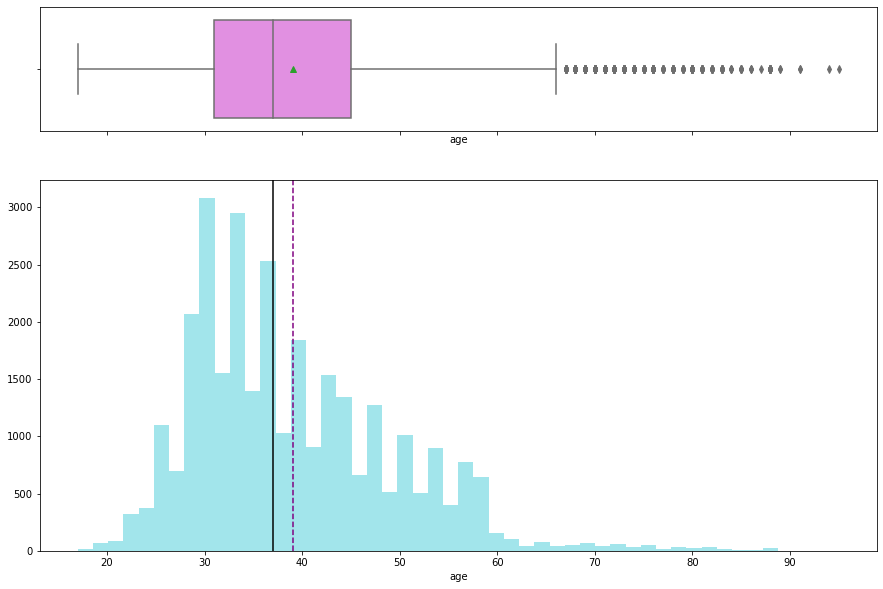

In [5]:
histobox(bankData.age)

/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


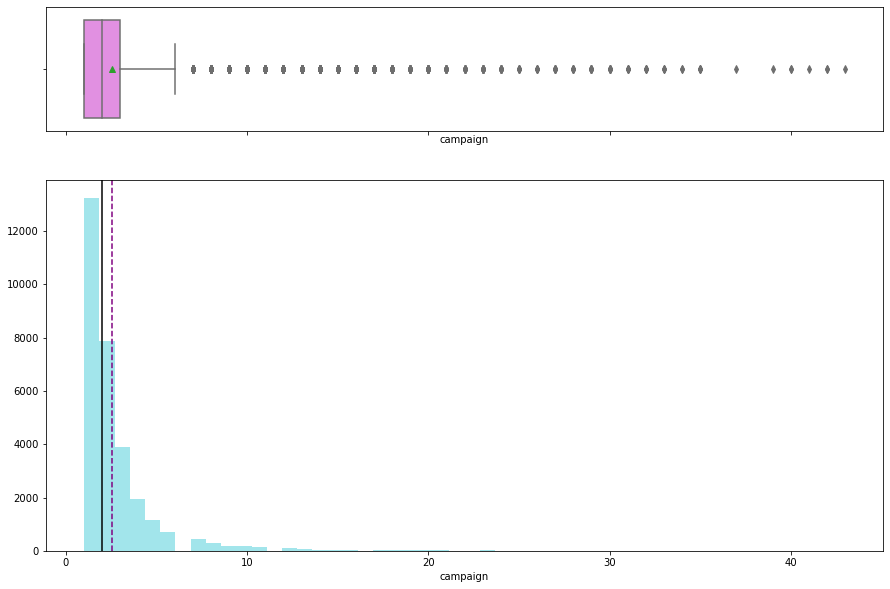

In [6]:
histobox(bankData.campaign)

/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


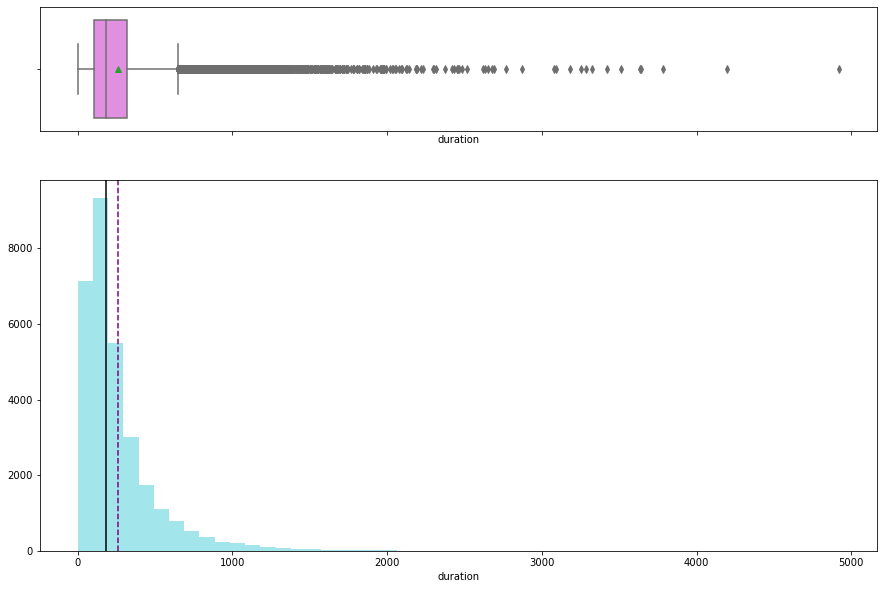

In [7]:
histobox(bankData.duration)

## Explore Joint Attributes

#### Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

The following is a heatmap of the continuous variables. 

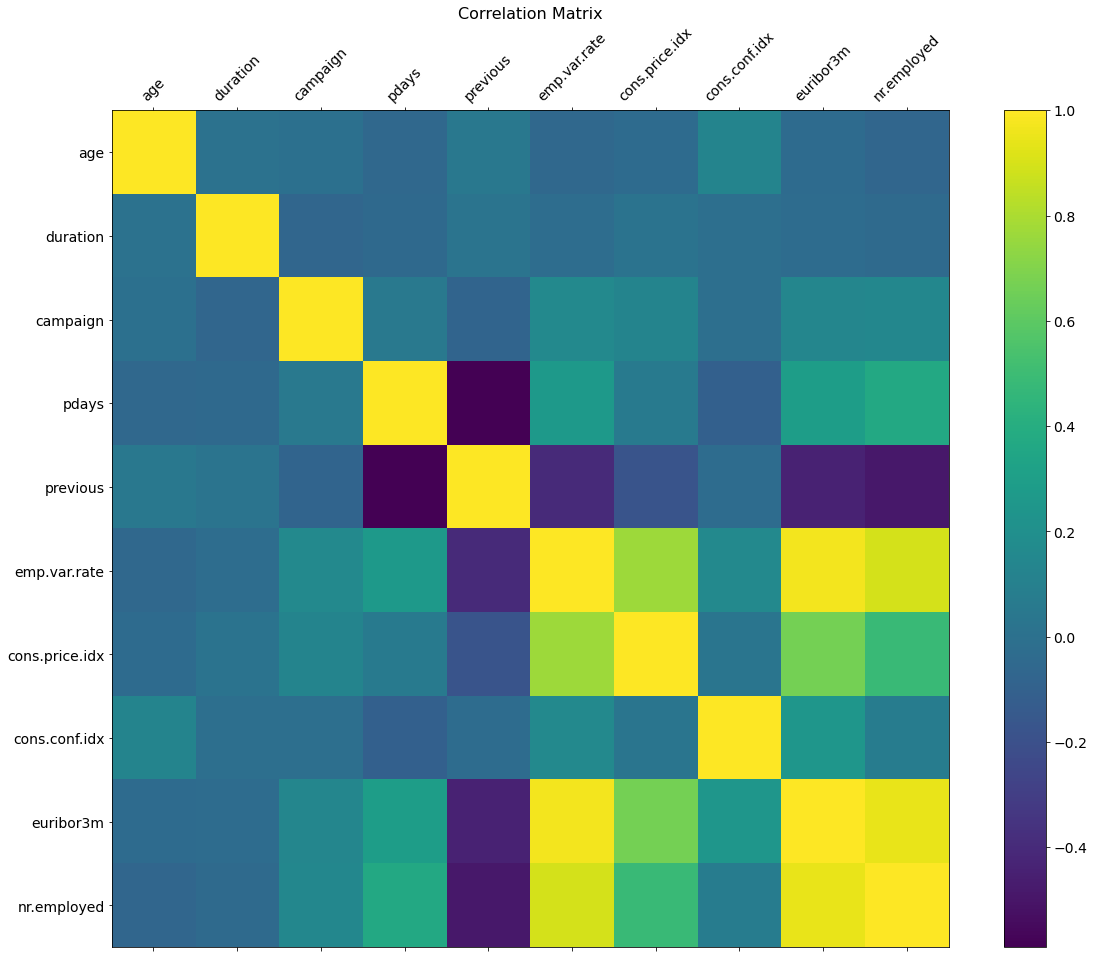

In [8]:
df = bankData
f = plt.figure(figsize=(20, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Explore Attributes and Class

#### Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [9]:
# Function to plot stacked bar chart w/ totals above
# stacked bar chart will be used for categorical variables
# Will be comparing all significant variables to ProdTaken/ProductPitched with boxplots next
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,bankData['y'],margins=True)
    print(tab1)
    print('-'*100)
    tab = pd.crosstab(x,bankData['y'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(15,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
    plt.show()



y                 no   yes    All
job                              
admin.          7521  1216   8737
blue-collar     5223   452   5675
entrepreneur     988   101   1089
housemaid        603    87    690
management      2025   286   2311
retired          859   357   1216
self-employed    960   132   1092
services        2599   258   2857
student          407   203    610
technician      4832   641   5473
unemployed       612   126    738
All            26629  3859  30488
----------------------------------------------------------------------------------------------------


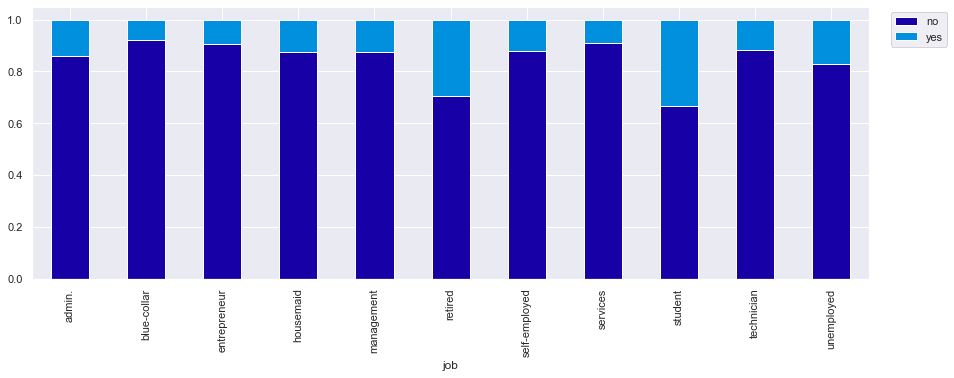

In [10]:
stacked_plot(bankData['job'])

In [11]:
list(bankData.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

<AxesSubplot:xlabel='job', ylabel='Count'>

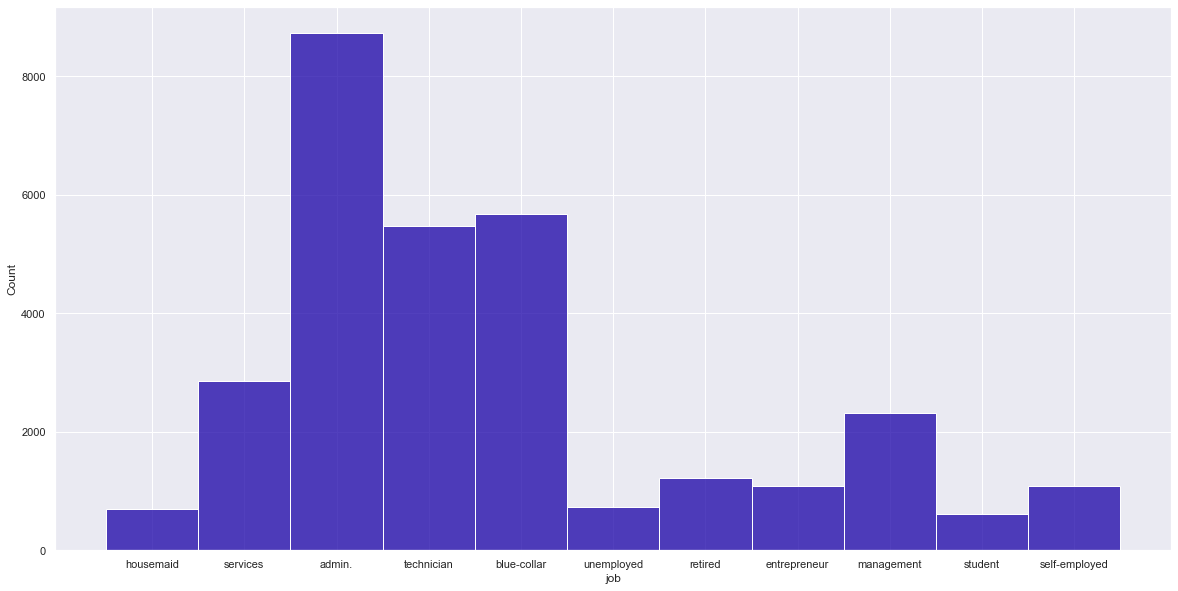

In [12]:
sns.histplot(data = bankData[bankData.y=='yes'], x = bankData.job)

                     Counts  Percentages
university.degree     10412        34.15
high.school            7699        25.25
professional.course    4321        14.17
basic.9y               4276        14.03
basic.4y               2380         7.81
basic.6y               1389         4.56
illiterate               11         0.04 




<AxesSubplot:xlabel='education', ylabel='Count'>

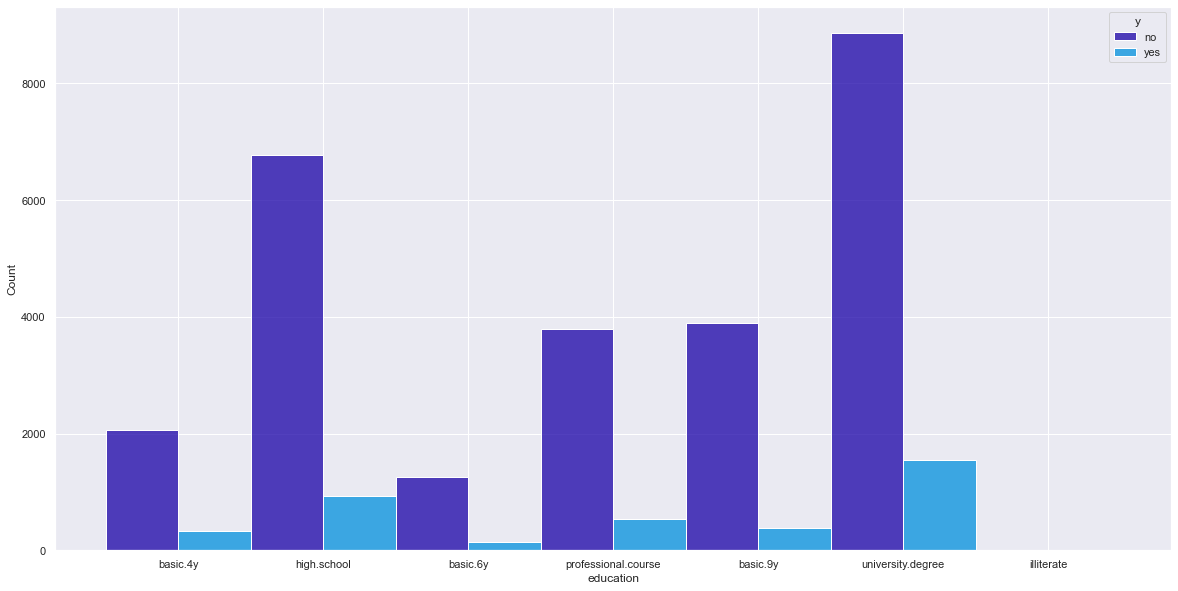

In [13]:
#bankData.set_index('education', inplace=True)
educationCount = bankData.education.value_counts()
educationPercentages = educationCount/len(bankData.education)
educationData = pd.DataFrame()
educationData['Counts']= educationCount
educationData['Percentages'] = round(educationPercentages * 100, 2)
print(educationData, "\n\n")
sns.histplot(data = bankData, x = bankData.education, hue = bankData.y, multiple='dodge')

## New Features

#### Are there other features that could be added to the data or created from existing features? Which ones?

The subject income was not given in the dataset and it can be assumed that the response variable would have at least some level of correlation to a person's income. Along those same lines, knowing what the subject's home or personal loan amount is could also provide valuable insight.



Another interesting idea involves knowing if the method of contacted changed from the previous contact with the potential client. This would give insight as to whether a calling someone on a house phone or cell phone would impact the response variable.

In [14]:
#Creating variables for indexing continuous and categorical variables
conCol = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
          'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
catCol = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
          'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Initial scan of variables to check data types
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [15]:
print(bankData.age.describe())

count    30488.000000
mean        39.030012
std         10.333529
min         17.000000
25%         31.000000
50%         37.000000
75%         45.000000
max         95.000000
Name: age, dtype: float64


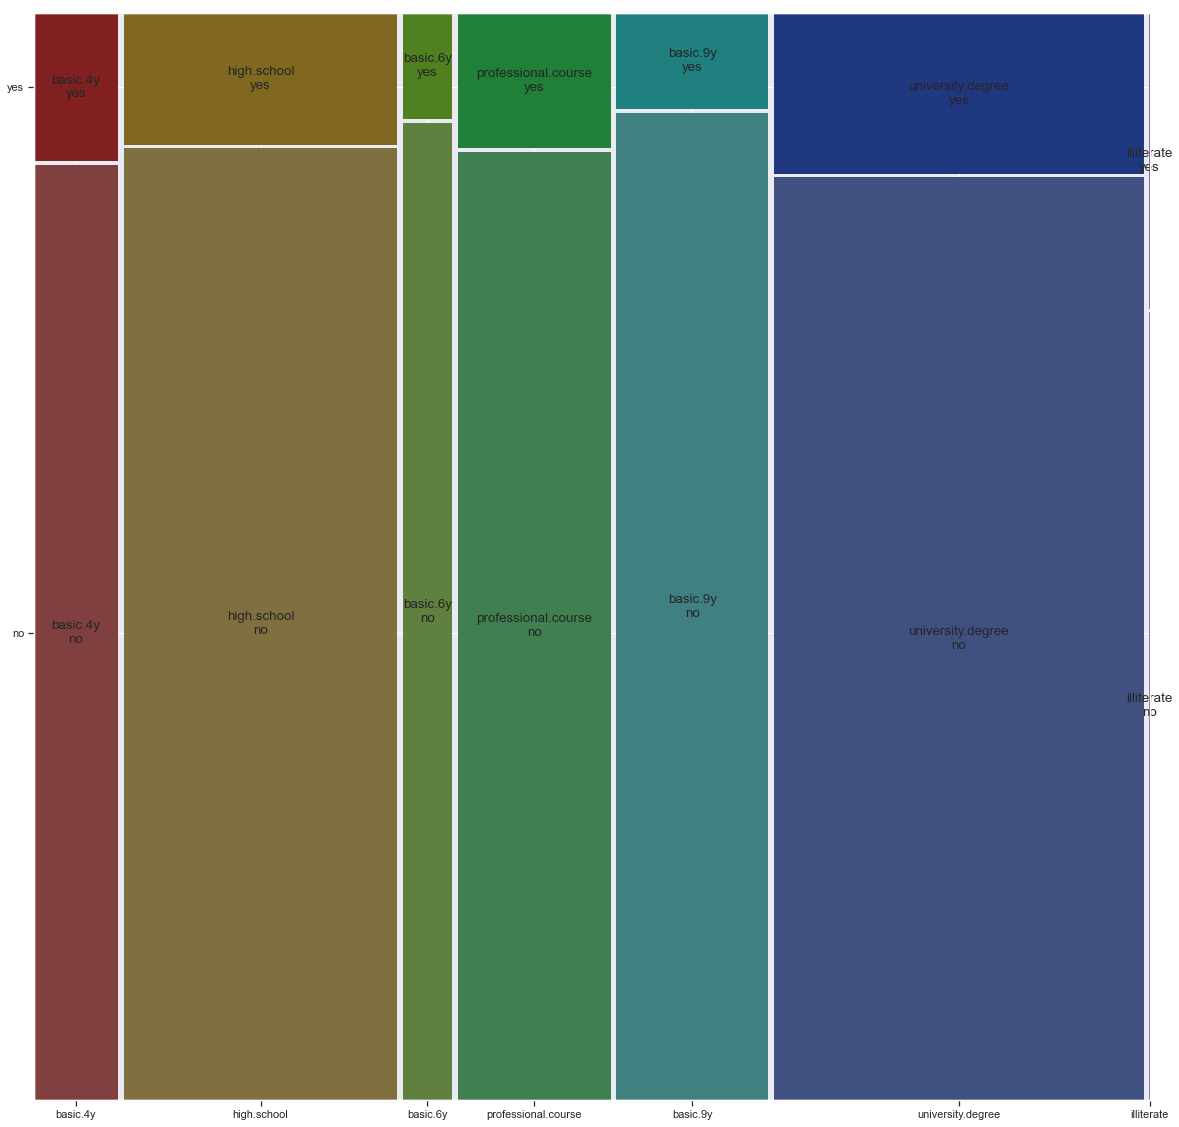

In [16]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.size'] = 16.0
mosaic(bankData, ['education', 'y']);

In [17]:
bankData.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.007910,-0.002364,-0.050891,0.049231,-0.050409,-0.035762,0.125017,-0.036481,-0.064586
duration,0.007910,1.000000,-0.068406,-0.046239,0.018772,-0.023374,0.012768,-0.009525,-0.028922,-0.040367
campaign,-0.002364,-0.068406,1.000000,0.054312,-0.080766,0.157739,0.127260,-0.011664,0.140836,0.148069
pdays,-0.050891,-0.046239,0.054312,1.000000,-0.590248,0.268763,0.068010,-0.102368,0.295188,0.370845
previous,0.049231,0.018772,-0.080766,-0.590248,1.000000,-0.403502,-0.176775,-0.027930,-0.438863,-0.488365
emp.var.rate,-0.050409,-0.023374,0.157739,0.268763,-0.403502,1.000000,0.766055,0.157593,0.969412,0.900390
cons.price.idx,-0.035762,0.012768,0.127260,0.068010,-0.176775,0.766055,1.000000,0.027217,0.667292,0.488871
cons.conf.idx,0.125017,-0.009525,-0.011664,-0.102368,-0.027930,0.157593,0.027217,1.000000,0.243637,0.075283
euribor3m,-0.036481,-0.028922,0.140836,0.295188,-0.438863,0.969412,0.667292,0.243637,1.000000,0.944871
nr.employed,-0.064586,-0.040367,0.148069,0.370845,-0.488365,0.900390,0.488871,0.075283,0.944871,1.000000


In [18]:
#one hot encoding of ALL categorical variables
# there is lot going on in this one line of code, so let's step through it

# pd.concat([*]], axis=1) // this line of code concatenates all the data frames in the [*] list
# [** for col in categ_features] // this steps through each feature in categ_features and 
#                                //   creates a new element in a list based on the output of **
# pd.get_dummies(df_imputed[col],prefix=col) // this creates a one hot encoded dataframe of the variable=col (like code above)

categ_features = ['job','marital','education','default','housing','loan','contact','month','poutcome'];

OneHotDF = pd.concat([pd.get_dummies(bankData[col],prefix=col,drop_first=True) for col in categ_features], axis=1)

OneHotDF.head()

#https://github.com/jakemdrew/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
OneHotDF.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

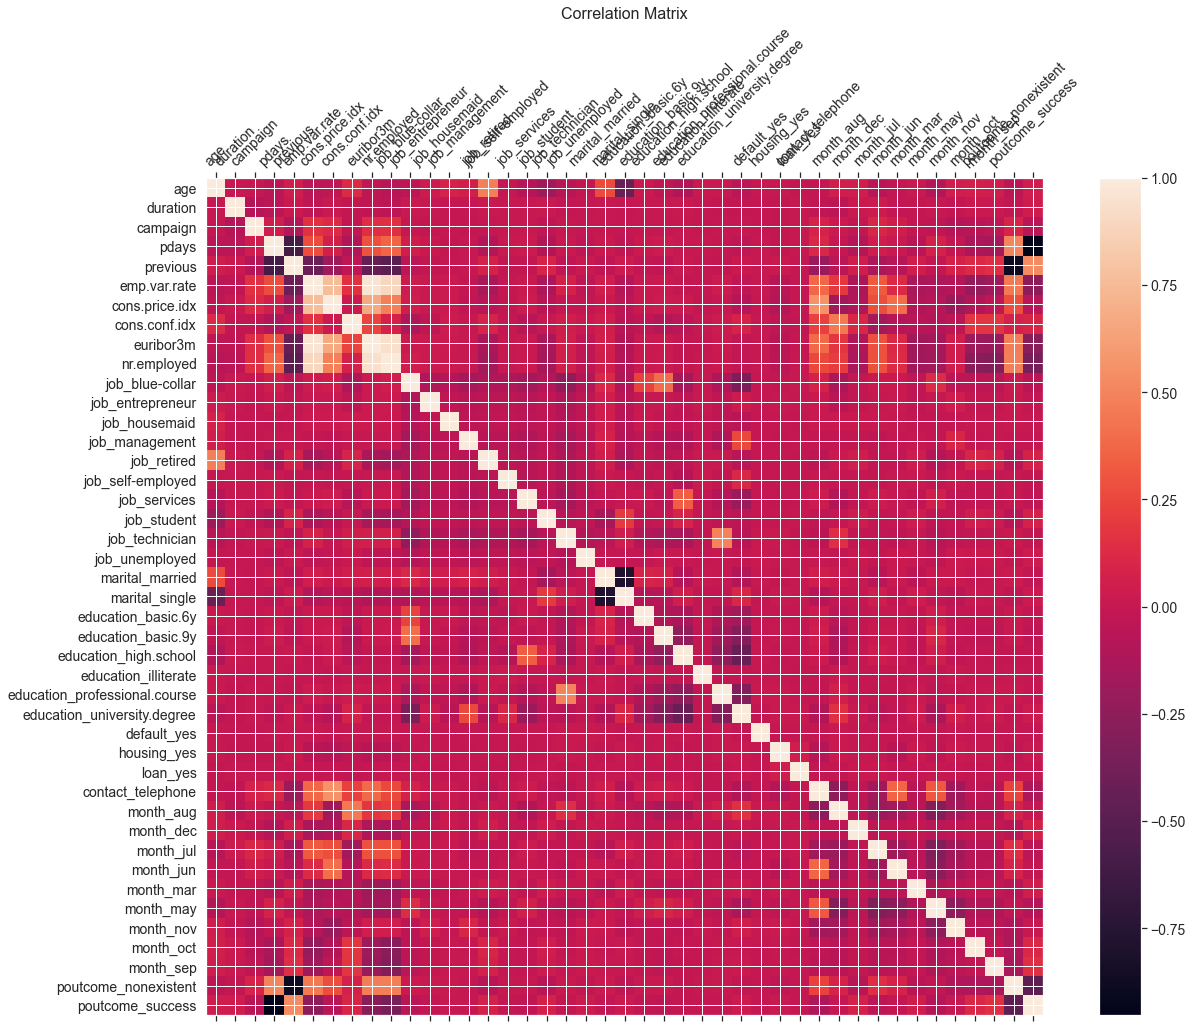

In [20]:
#Merged OneHotDF and bankData

mergedDF = pd.concat([bankData.select_dtypes(exclude='object'),OneHotDF],axis=1)

#heatmap code from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
df = mergedDF
f = plt.figure(figsize=(20, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
#Test